In [3]:
#IJulia.load("../neural_odes/lotka_volterra_parameter_estimation.jl")

In [1]:
using DifferentialEquations, Plots

function lotka_volterra(dudt, u, p, t)
  x, y = u
  α, β, δ, γ = p

  dudt[1] = dx =  α*x - β*x*y
  dudt[2] = dy = -δ*y + γ*x*y
end

lotka_volterra (generic function with 1 method)

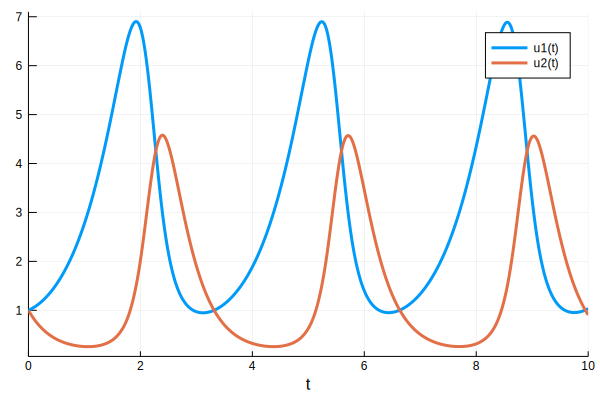

In [2]:
u₀ = [1.0, 1.0]
tspan = (0.0, 10.0)
parameters = [1.5, 1.0, 3.0, 1.0]
prob = ODEProblem(lotka_volterra, u₀, tspan, parameters)
sol = solve(prob, Tsit5())

plot(sol)

In [4]:
using Flux, DiffEqFlux

p = param([2.2, 1.0, 2.0, 0.4]) # Initial Parameter Vector
params = Flux.Params([p])

function predict_adjoint() # Our 1-layer neural network
  diffeq_adjoint(p, prob, Tsit5(), saveat=0.0:0.1:10.0)
end

loss_adjoint() = sum(abs2, x-1 for x in predict_adjoint())

data = Iterators.repeated((), 100)
opt = ADAM(0.1)
cb = function () #callback function to observe training
  display(loss_adjoint())
  # using `remake` to re-create our `prob` with current parameters `p`
  display(plot(solve(remake(prob,p=Flux.data(p)),Tsit5(),saveat=0.0:0.1:10.0),ylim=(0,6)))
end

# Display the ODE with the initial parameter values.
cb()

Flux.train!(loss_adjoint, params, data, opt, cb = cb)

┌ Info: Recompiling stale cache file C:\Users\daddyj\.julia\compiled\v1.2\DiffEqFlux\BdO4p.ji for DiffEqFlux [aae7a2af-3d4f-5e19-a356-7da93b79d9d0]
└ @ Base loading.jl:1240
ERROR: LoadError: ArgumentError: Package StatsModels does not have DataAPI in its dependencies:
- If you have StatsModels checked out for development and have
  added DataAPI as a dependency but haven't updated your primary
  environment's manifest file, try `Pkg.resolve()`.
- Otherwise you may need to report an issue with StatsModels
Stacktrace:
 [1] require(::Module, ::Symbol) at .\loading.jl:889
 [2] include at .\boot.jl:328 [inlined]
 [3] include_relative(::Module, ::String) at .\loading.jl:1094
 [4] include(::Module, ::String) at .\Base.jl:31
 [5] top-level scope at none:2
 [6] eval at .\boot.jl:330 [inlined]
 [7] eval(::Expr) at .\client.jl:432
 [8] top-level scope at .\none:3
in expression starting at C:\Users\daddyj\.julia\packages\StatsModels\9cHwk\src\StatsModels.jl:7
ERROR: LoadError: Failed to precompile

ErrorException: Failed to precompile DiffEqFlux [aae7a2af-3d4f-5e19-a356-7da93b79d9d0] to C:\Users\daddyj\.julia\compiled\v1.2\DiffEqFlux\BdO4p.ji.